In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


In [2]:
with open('experimentResults.pickle', 'rb') as input:
    results = pickle.load(input)
    # print number of iterations:
    print(results['iterations'])
    # print list of used ks (number of original samples):
    print(results['ks'])
    # print list of used ms (number of generated samples):
    print(results['ms'])
    # first iteration, 100 original, 0 generated:
    print(results[0][100][0])

10
[100, 500, 1000, 5000]
[0, 100, 500, 1000, 5000, 10000]
{'TN': 940, 'FP': 28, 'FN': 34, 'TP': 946}


In [3]:
def cmToMeasures(i, k, m):
    cm = results[i][k][m]
    TP = cm['TP']
    FP = cm['FP']
    TN = cm['TN']
    FN = cm['FN']
    accuracy = float(TP + TN) / (TP + FP + TN + FN)
    error = float(FP + FN) / (TP + FP + TN + FN)
    return [accuracy, error]

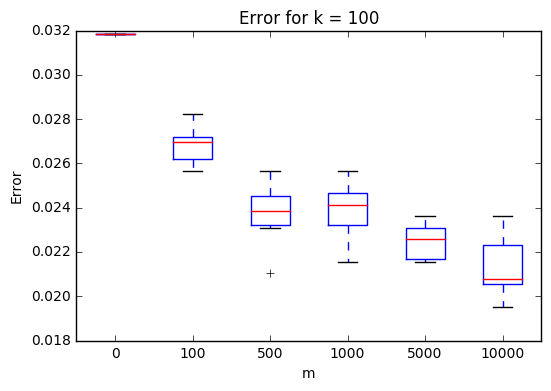

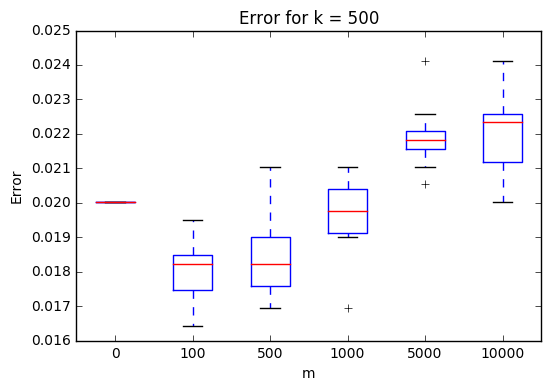

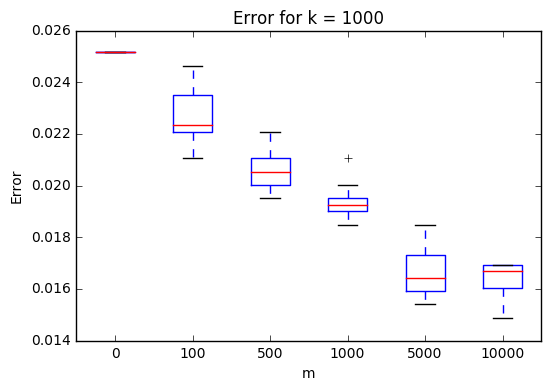

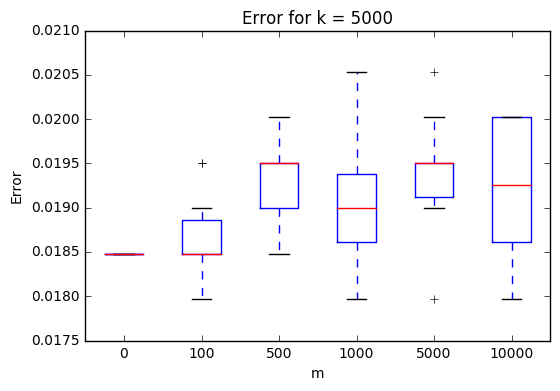

In [4]:
for k in results['ks']:
    data = []
    for i in range(0,results['iterations']):
        iterationRes = []
        for m in results['ms']:
            [accuracy, error] = cmToMeasures(i, k, m)
            iterationRes.append(error)
        data.append(iterationRes)

    data = np.array(data)
    fig, ax1 = plt.subplots()
    ax1.set_axisbelow(True)
    ax1.set_title('Error for k = ' +str(k))
    ax1.set_xlabel('m')
    ax1.set_ylabel('Error')
    plt.boxplot(data)
    plt.xticks(range(1,(len(results['ms'])+1)), results['ms'])
    plt.show()
    

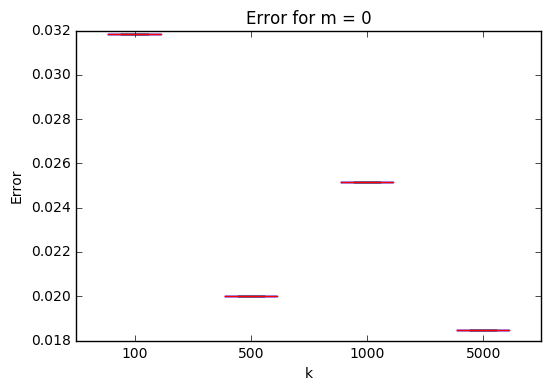

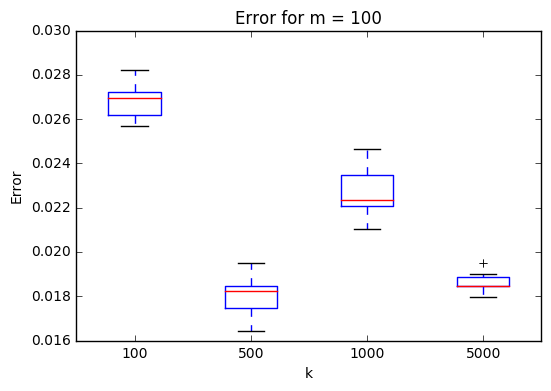

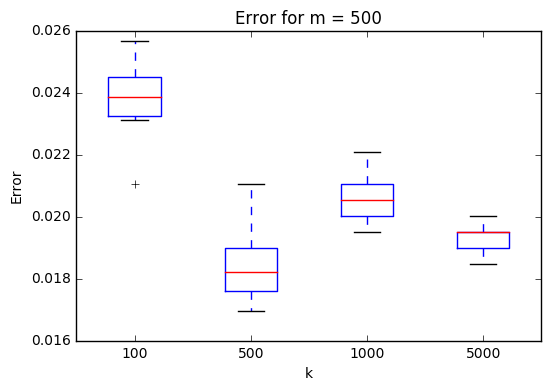

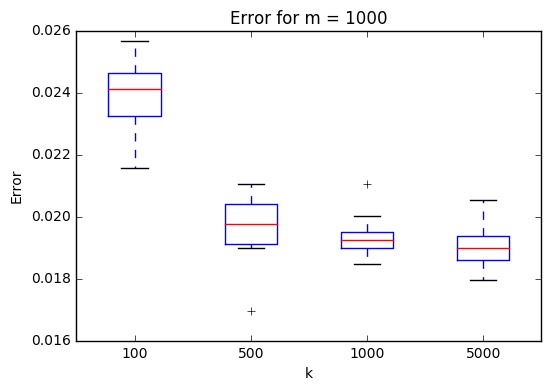

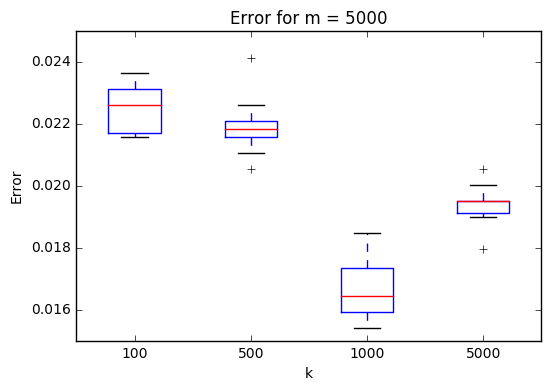

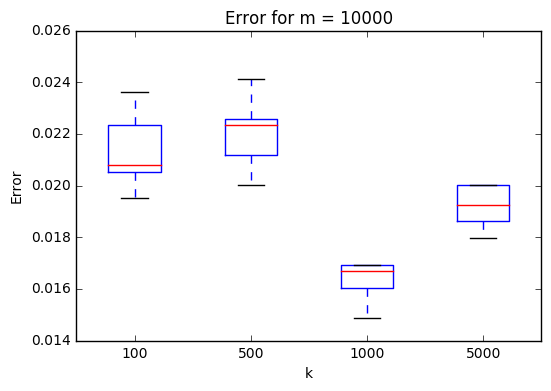

In [5]:
for m in results['ms']:
    data = []
    for i in range(0,results['iterations']):
        iterationRes = []
        for k in results['ks']:
            [accuracy, error] = cmToMeasures(i, k, m)
            iterationRes.append(error)
        data.append(iterationRes)

    data = np.array(data)
    fig, ax1 = plt.subplots()
    ax1.set_axisbelow(True)
    ax1.set_title('Error for m = ' +str(m))
    ax1.set_xlabel('k')
    ax1.set_ylabel('Error')
    plt.boxplot(data)
    plt.xticks(range(1,(len(results['ks'])+1)), results['ks'])
    plt.show()